## 6.4: Supervised Machine Learning: Regression

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [64]:
# define path
path = '/Users/LuisD/Documents/CareerFoundry/Achievement 6/AIR BNB Analysis'

In [66]:
#import
listings = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'listings_complete_cleaned.csv'), index_col = False)

In [68]:
listings.shape

(20030, 15)

In [70]:
listings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         20030 non-null  int64  
 1   id                 20030 non-null  int64  
 2   name               20030 non-null  object 
 3   neighbourhood      20030 non-null  object 
 4   room_type          20030 non-null  object 
 5   price              20030 non-null  int64  
 6   number_of_reviews  20030 non-null  int64  
 7   reviews_per_month  20030 non-null  float64
 8   availability_365   20030 non-null  int64  
 9   host_is_superhost  20026 non-null  object 
 10  property_type      20030 non-null  object 
 11  bedrooms           20030 non-null  int64  
 12  security_deposit   20030 non-null  float64
 13  cleaning_fee       20030 non-null  float64
 14  Price category     20030 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.3+ MB


In [72]:
# Drop column
listings = listings.drop(columns=['Unnamed: 0'])

In [74]:
listings.head()


,id,name,neighbourhood,room_type,price,number_of_reviews,reviews_per_month,availability_365,host_is_superhost,property_type,bedrooms,security_deposit,cleaning_fee,Price category
0,2818,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,248,2.10,44,t,Apartment,1,100.0,50.0,Low price
1,3209,"Quiet apt near center, great view",Westerpark,Entire home/apt,160,42,1.03,47,f,Apartment,2,300.0,40.0,Low price
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,Centrum-Oost,Entire home/apt,80,233,2.18,198,f,Townhouse,1,0.0,0.0,Low price
3,25428,Lovely apt in City Centre (Jordaan),Centrum-West,Entire home/apt,125,1,0.09,141,f,Apartment,1,300.0,40.0,Low price
4,27886,"Romantic, stylish B&B houseboat in canal district",Centrum-West,Private room,150,171,2.03,199,t,Houseboat,1,0.0,0.0,Low price


In [76]:
listings.columns

Index(['id', 'name', 'neighbourhood', 'room_type', 'price',
       'number_of_reviews', 'reviews_per_month', 'availability_365',
       'host_is_superhost', 'property_type', 'bedrooms', 'security_deposit',
       'cleaning_fee', 'Price category'],
      dtype='object')

In [78]:
print(listings.isnull().sum())


id                   0
name                 0
neighbourhood        0
room_type            0
price                0
number_of_reviews    0
reviews_per_month    0
availability_365     0
host_is_superhost    4
property_type        0
bedrooms             0
security_deposit     0
cleaning_fee         0
Price category       0
dtype: int64


In [80]:
listings['host_is_superhost'].fillna("f", inplace=True)

/var/folders/l6/6xtwqmpx0rsb9tx3k_scftwm0000gp/T/ipykernel_97899/4253174509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings['host_is_superhost'].fillna("f", inplace=True)


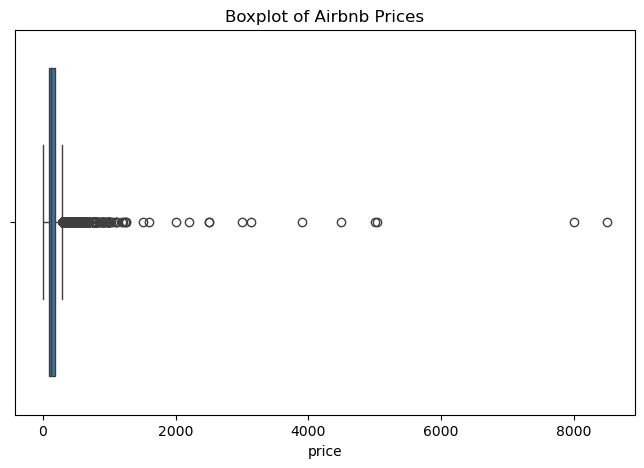

In [133]:
# boxplot to visualize extreme values.
plt.figure(figsize=(8, 5))
sns.boxplot(x=listings['price'])
plt.title("Boxplot of Airbnb Prices")
plt.show()

In [135]:
Q1 = listings['price'].quantile(0.25)  # 25th percentile
Q3 = listings['price'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find number of outliers
outliers = listings[(listings['price'] < lower_bound) | (listings['price'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 1272


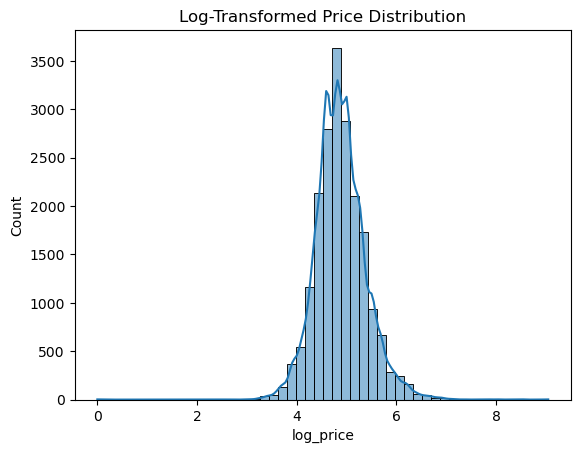

In [137]:
# log transformation
listings['log_price'] = np.log1p(listings['price'])  # log1p avoids log(0) errors
sns.histplot(listings['log_price'], bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()

In [139]:
listings.head()

,id,name,neighbourhood,room_type,price,number_of_reviews,reviews_per_month,availability_365,host_is_superhost,property_type,bedrooms,security_deposit,cleaning_fee,Price category,log_price
0,2818,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,248,2.10,44,t,Apartment,1,100.0,50.0,Low price,4.094345
1,3209,"Quiet apt near center, great view",Westerpark,Entire home/apt,160,42,1.03,47,f,Apartment,2,300.0,40.0,Low price,5.081404
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,Centrum-Oost,Entire home/apt,80,233,2.18,198,f,Townhouse,1,0.0,0.0,Low price,4.394449
3,25428,Lovely apt in City Centre (Jordaan),Centrum-West,Entire home/apt,125,1,0.09,141,f,Apartment,1,300.0,40.0,Low price,4.836282
4,27886,"Romantic, stylish B&B houseboat in canal district",Centrum-West,Private room,150,171,2.03,199,t,Houseboat,1,0.0,0.0,Low price,5.017280


In [82]:
print(listings.isnull().sum())


id                   0
name                 0
neighbourhood        0
room_type            0
price                0
number_of_reviews    0
reviews_per_month    0
availability_365     0
host_is_superhost    0
property_type        0
bedrooms             0
security_deposit     0
cleaning_fee         0
Price category       0
dtype: int64


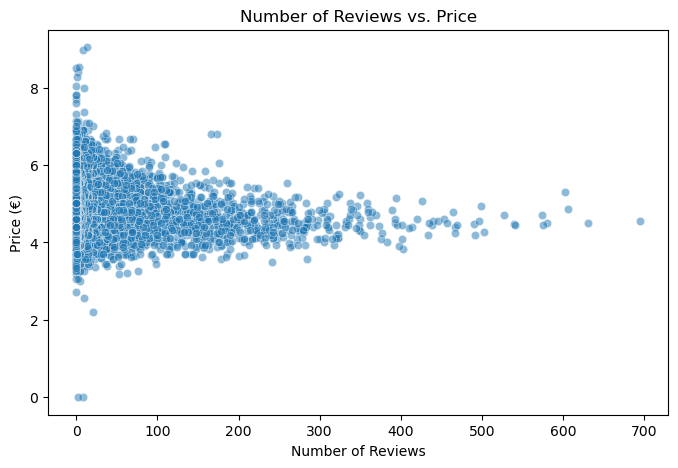

In [164]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=listings['number_of_reviews'], y=listings['log_price'], alpha=0.5)
plt.title("Number of Reviews vs. Price")
plt.xlabel("Number of Reviews")
plt.ylabel("Price (€)")
plt.show()

Does having more reviews impact price? Are cheaper listings reviewed more often?

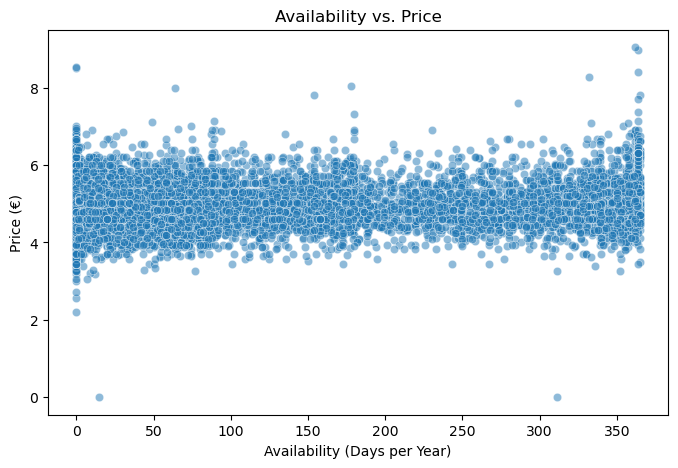

In [166]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=listings['availability_365'], y=listings['log_price'], alpha=0.5)
plt.title("Availability vs. Price")
plt.xlabel("Availability (Days per Year)")
plt.ylabel("Price (€)")
plt.show()

Do more available listings tend to be cheaper?

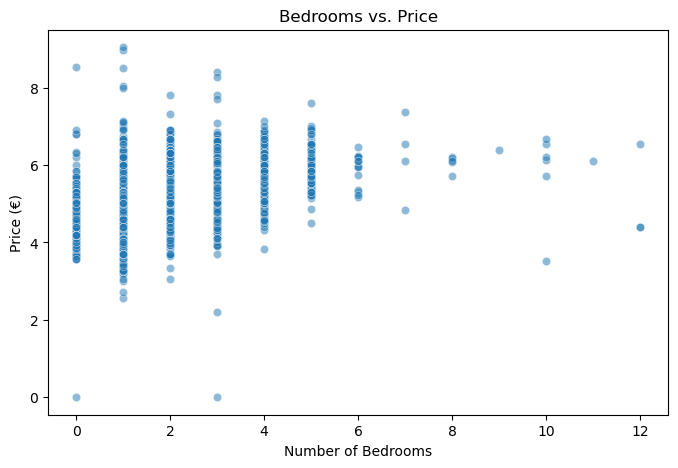

In [168]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=listings['bedrooms'], y=listings['log_price'], alpha=0.5)
plt.title("Bedrooms vs. Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price (€)")
plt.show()

Do larger properties charge significantly more?

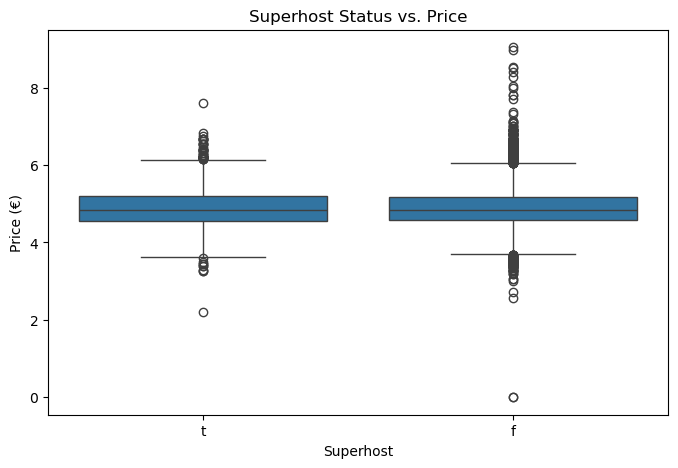

In [170]:
plt.figure(figsize=(8,5))
sns.boxplot(x=listings['host_is_superhost'], y=listings['log_price'])
plt.title("Superhost Status vs. Price")
plt.xlabel("Superhost")
plt.ylabel("Price (€)")
plt.show()

Do Superhosts charge higher prices than regular hosts?

# Hypothesis:  “Airbnb listings with lower availability, booked more frequently, tend to have higher prices.”

Reshape the variables into NumPy arrays, with X (availability_365) being the independent variable and y (price)being the dependent variable





In [172]:
# Select independent variables (X) and dependent variable (y)
X = listings[['availability_365', 'number_of_reviews']]
y = listings['log_price']

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

In [174]:
# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")  # Shows impact of 'availability_365' and 'number_of_reviews' on price

Intercept: 4.865974052677781
Coefficients: [ 0.00101118 -0.0020497 ]


In [178]:
# Predict on test set
y_pred = model.predict(X_test)

In [180]:
from sklearn.metrics import mean_absolute_error

In [182]:
# Calculate R-squared and Mean Absolute Error (MAE)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R-squared: 0.07
Mean Absolute Error: 0.37


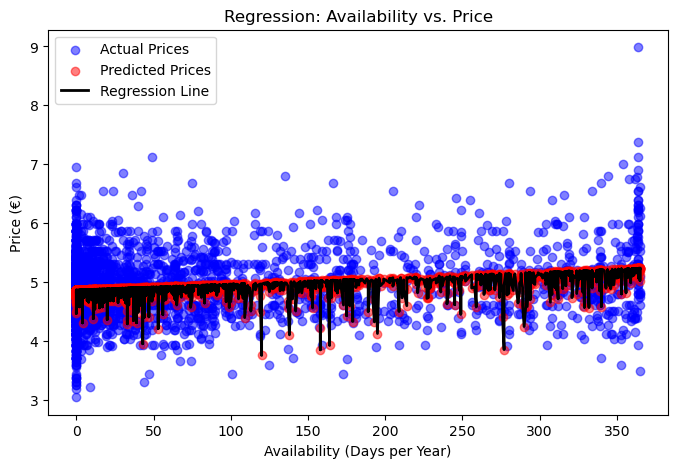

In [184]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8,5))
plt.scatter(X_test[:, 0], y_test, color="blue", alpha=0.5, label="Actual Prices")  # availability_365 vs actual price
plt.scatter(X_test[:, 0], y_pred, color="red", alpha=0.5, label="Predicted Prices")  # availability_365 vs predicted price

# Plot regression line
sorted_indices = np.argsort(X_test[:, 0])
plt.plot(X_test[:, 0][sorted_indices], y_pred[sorted_indices], color="black", linewidth=2, label="Regression Line")

plt.xlabel("Availability (Days per Year)")
plt.ylabel("Price (€)")
plt.title("Regression: Availability vs. Price")
plt.legend()
plt.show()

* If the predicted prices closely follow the actual prices, it suggest that the model is accurate. However there are significant deviations indicating issues with the model's assumption or imput data.
  

In [155]:
# Check the model performance statistics—MSE and R2 score.
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")  # More decimal places for accuracy

Mean Squared Error (MSE): 0.24
R² Score: 0.0651


In [157]:
# Create a DataFrame to compare actual and predicted prices
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Display the first 10 rows for a quick check
print(comparison_df.head(10))

   Actual Price  Predicted Price
0      4.867534         4.954931
1      6.216606         4.820881
2      4.753590         4.863924
3      4.110874         4.855726
4      5.236442         4.761439
5      4.875197         4.837278
6      5.017280         5.137982
7      4.499810         4.884039
8      4.219508         4.861875
9      4.394449         4.851626


Observations:
* It looks like the predicted prices are somewhat close to the actual prices, but there are still discrepancies.
* The predicted price 4.820881 is quite far from the actual price 6.216606, and this could indicate that the model has some difficulty in handling certain cases.



Impact of Data Bias
* If the data overemphasizes high-end properties, the predicted prices for more affordable listings might be consistently underestimated.
* If the dataset disproportionately includes listings from a certain area or price range, the model may struggle to generalize to other types of properties
* If factors such as location, property size, or amenities are not properly balanced or accounted for in the model, the predictions might be systematically biased toward certain types of properties.
  

In [190]:
listings.to_csv(os.path.join(path, 'Data','Prepared Data', 'listings_complete_6_4.csv'))
